# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [4]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.1.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet(r"C:\Users\dkevi\OneDrive\Desktop\Data Science & AI - IIITB\Data_Analysis_Exploration\EDA_assignment_NYC_taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet")
# df = pd.read_parquet('2023-1.parquet')
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r"C:\Users\dkevi\OneDrive\Desktop\Data Science & AI - IIITB\Data_Analysis_Exploration\EDA_assignment_NYC_taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")
# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith(".parquet")]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"Processing file: {file_name}")

        # Reading the current file
        month_df = pd.read_parquet(file_name)

        #Extract date and hour from pickup datetime
        month_df["pickup_date"] = month_df["tpep_pickup_datetime"].dt.date
        month_df["pickup_hour"] = month_df["tpep_pickup_datetime"].dt.hour


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df["pickup_date"].unique():
            date_df = month_df[month_df["pickup_date"] == date]
            # Iterate through each hour of the selected date
            for hour in date_df["pickup_hour"].unique():
                hour_df = date_df[date_df["pickup_hour"] == hour]

                # Sample 5% of the hourly data randomly
                if len(hour_df) > 0:
                    sample = hour_df.sample(frac = 0.05, random_state = 42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample], ignore_index = True)
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data], ignore_index = True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processing file: 2023-1.parquet
Processing file: 2023-10.parquet
Processing file: 2023-11.parquet
Processing file: 2023-12.parquet
Processing file: 2023-2.parquet
Processing file: 2023-3.parquet
Processing file: 2023-4.parquet
Processing file: 2023-5.parquet
Processing file: 2023-6.parquet
Processing file: 2023-7.parquet
Processing file: 2023-8.parquet
Processing file: 2023-9.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
# df.to_parquet('')
print("Total rows before final sampling:", len(df))

if len(df) > 300000:
    df = df.sample(n = 300000, random_state = 42).reset_index(drop = True)

print("Total rows after final sampling:", len(df))

df.to_parquet('nyc_taxi_sampled_data.parquet', index = False)

Total rows before final sampling: 300000
Total rows after final sampling: 300000


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [6]:
# Load the new data file
df_new = pd.read_parquet(r"C:\Users\dkevi\OneDrive\Desktop\Data Science & AI - IIITB\Data_Analysis_Exploration\EDA_assignment_NYC_taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\nyc_taxi_sampled_data.parquet")



In [7]:
# df.head()
df_new.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,1,2023-04-21 14:27:29,2023-04-21 14:31:29,1.0,0.50,1.0,N,79,107,2,...,0.5,0.00,0.0,1.0,9.80,2.5,NaN,2023-04-21,14,0.0
1,2,2023-01-10 09:36:36,2023-01-10 09:44:45,1.0,1.59,1.0,N,137,229,2,...,0.5,0.00,0.0,1.0,14.00,2.5,0.0,2023-01-10,9,NaN
2,2,2023-02-04 20:07:56,2023-02-04 20:17:06,1.0,1.04,1.0,N,224,79,1,...,0.5,1.80,0.0,1.0,16.80,2.5,NaN,2023-02-04,20,0.0
3,2,2023-03-24 12:33:07,2023-03-24 12:59:15,2.0,2.57,1.0,N,186,239,1,...,0.5,5.46,0.0,1.0,32.76,2.5,NaN,2023-03-24,12,0.0
4,2,2023-09-05 17:03:28,2023-09-05 17:12:44,1.0,1.74,1.0,N,142,237,1,...,0.5,3.58,0.0,1.0,21.48,2.5,NaN,2023-09-05,17,0.0
5,2,2023-11-15 08:41:24,2023-11-15 09:01:54,1.0,2.24,1.0,N,236,161,1,...,0.5,5.60,0.0,1.0,28.00,2.5,NaN,2023-11-15,8,0.0
6,2,2023-01-27 05:49:49,2023-01-27 05:54:48,1.0,1.07,1.0,N,186,230,1,...,0.5,0.00,0.0,1.0,12.90,2.5,0.0,2023-01-27,5,NaN
7,2,2023-06-01 15:40:58,2023-06-01 16:27:38,2.0,0.01,2.0,N,226,226,2,...,0.5,0.00,0.0,1.0,74.00,2.5,NaN,2023-06-01,15,0.0
8,2,2023-12-13 09:17:12,2023-12-13 09:28:09,1.0,1.51,1.0,N,162,234,1,...,0.5,3.08,0.0,1.0,18.48,2.5,NaN,2023-12-13,9,0.0
9,2,2023-04-14 09:09:05,2023-04-14 09:25:21,1.0,2.09,1.0,N,141,107,1,...,0.5,1.00,0.0,1.0,20.60,2.5,NaN,2023-04-14,9,0.0


In [8]:
# df.info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289687 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289687 non-null  float64       
 6   store_and_fwd_flag     289687 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [9]:
# Fix the index and drop any columns that are not needed

# Reset index to ensure a clean continuous index
df_new = df_new.reset_index(drop = True)

# Dropping the helper columns used only for sampling
df_new = df_new.drop(columns = ["pickup_date", "pickup_hour"], errors = "ignore")

# Checking the updated dataframe structure
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289687 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289687 non-null  float64       
 6   store_and_fwd_flag     289687 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [10]:
# Combine the two airport fee columns
df_new["airport_fee"] = df_new["airport_fee"].fillna(df_new["Airport_fee"])

# drop the duplicate column
df_new = df_new.drop(columns = ["Airport_fee"])

In [11]:
df_new.info()
df_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289687 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289687 non-null  float64       
 6   store_and_fwd_flag     289687 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2023-04-21 14:27:29,2023-04-21 14:31:29,1.0,0.50,1.0,N,79,107,2,5.8,2.5,0.5,0.00,0.0,1.0,9.80,2.5,0.0
1,2,2023-01-10 09:36:36,2023-01-10 09:44:45,1.0,1.59,1.0,N,137,229,2,10.0,0.0,0.5,0.00,0.0,1.0,14.00,2.5,0.0
2,2,2023-02-04 20:07:56,2023-02-04 20:17:06,1.0,1.04,1.0,N,224,79,1,10.0,1.0,0.5,1.80,0.0,1.0,16.80,2.5,0.0
3,2,2023-03-24 12:33:07,2023-03-24 12:59:15,2.0,2.57,1.0,N,186,239,1,23.3,0.0,0.5,5.46,0.0,1.0,32.76,2.5,0.0
4,2,2023-09-05 17:03:28,2023-09-05 17:12:44,1.0,1.74,1.0,N,142,237,1,11.4,2.5,0.5,3.58,0.0,1.0,21.48,2.5,0.0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [12]:
# check where values of fare amount are negative
df_new[df_new["fare_amount"] < 0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [13]:
# Analyse RatecodeID for the negative fare amounts
df_new[df_new["fare_amount"] < 0]["RatecodeID"]


Series([], Name: RatecodeID, dtype: float64)

In [14]:
# Find which columns have negative values
neg_value_columns = [col for col in df_new.select_dtypes(include = [np.number]).columns if (df_new[col] < 0).any()]

neg_value_columns

['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [15]:
# fix these negative values

# Fixing the negative values by removing the afffected rows
for col in neg_value_columns:
    df_new = df_new[df_new[col] > 0]

# Reset index after cleaning
df_new = df_new.reset_index(drop = True)


In [16]:
(df_new[neg_value_columns] < 0).sum()

extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [17]:
# Find the proportion of missing values in each column

#Caluculate proportion of missing values in each column
missing_proportion = df_new.isnull().mean()

#Display columns with missing values
missing_proportion[missing_proportion > 0].sort_values(ascending = False)



Series([], dtype: float64)

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [18]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df_new[df_new["passenger_count"].isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [19]:
# Fix missing values in 'RatecodeID'

# Check missing values in 'RatecodeID'
print(df_new["RatecodeID"].isna().sum())
print(df_new["RatecodeID"].value_counts())

0
RatecodeID
1.0    6980
2.0    2528
4.0       8
5.0       2
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [20]:
# handle null values in congestion_surcharge

#Checking for missing values in 'congestion_surcharge'
print(df_new["congestion_surcharge"].isna().sum())
print(df_new["congestion_surcharge"].value_counts())


0
congestion_surcharge
2.5    9518
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [18]:
# Handle any remaining missing values

# No missing values present/remaining in my dataframe

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [21]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
numeric_cols = df_new.select_dtypes(include = ["int64", "float64"]).columns
df_new[numeric_cols].describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.000000,9518.0,9518.000000,9518.000000,9518.000000,9518.000000,9518.0,9518.000000
mean,1.681130,1.398823,12.313058,1.268964,133.504623,167.599181,1.138895,51.805211,6.113916,0.5,10.258722,5.762424,0.999779,78.260209,2.5,1.633747
std,0.466063,0.871367,4.333327,0.451894,20.054327,65.591527,0.380570,14.100470,2.048455,0.0,6.018459,2.528934,0.012426,15.647451,0.0,0.211226
min,1.000000,0.000000,0.000000,1.000000,10.000000,1.000000,1.000000,3.000000,1.000000,0.5,0.000000,0.000000,0.300000,7.000000,2.5,1.250000
25%,1.000000,1.000000,9.150000,1.000000,132.000000,125.000000,1.000000,40.100000,5.000000,0.5,6.000000,6.550000,1.000000,66.540000,2.5,1.750000
50%,2.000000,1.000000,10.500000,1.000000,138.000000,163.000000,1.000000,48.500000,5.000000,0.5,11.350000,6.550000,1.000000,76.545000,2.5,1.750000
75%,2.000000,2.000000,16.800000,2.000000,138.000000,230.000000,1.000000,70.000000,7.500000,0.5,14.400000,6.940000,1.000000,87.900000,2.5,1.750000
max,2.000000,6.000000,50.000000,5.000000,264.000000,265.000000,4.000000,268.300000,11.750000,0.5,60.600000,38.000000,1.000000,281.600000,2.5,1.750000


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [22]:
# remove passenger_count > 6
df_new = df_new[df_new["passenger_count"] <= 6].reset_index(drop = True)

In [23]:
df_new.shape

(9518, 19)

In [24]:
# Continue with outlier handling

# 1. Remove trips with near zero distance but high fare amounts
df_new = df_new[~((df_new["trip_distance"] < 0.1) & (df_new["fare_amount"] > 300))]

# 2. Remove trips with zero distance and zero fares but different pickup and dropoff locations
df_new = df_new[~((df_new["trip_distance"] == 0) & (df_new["fare_amount"] == 0) & (df_new["PULocationID"] != df_new["DOLocationID"]))]

# 3. Remove trips with unrealistically large trip distances
df_new = df_new[df_new["trip_distance"] <= 250]

# 4. Remove trips with invalid payment type (0 is not a valid payment type)
df_new = df_new[df_new["payment_type"] != 0]

# Reset index after outlier removal
df_new = df_new.reset_index(drop = True)


In [25]:
df_new.shape

(9518, 19)

In [26]:
# Do any columns need standardising?
#Standarsing the columns that need to be standardised for consistency and better readability
df_new["passenger_count"] = df_new["passenger_count"].astype(int)
df_new["RatecodeID"] = df_new["RatecodeID"].astype(int)
df_new["payment_type"] = df_new["payment_type"].astype(int)
df_new["VendorID"] = df_new["VendorID"].astype(int)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [27]:
df_new.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [ ]:
'''Categorising the columns into different types for better analysis later
VendorID - Categorical - Code identifying the vendor
RatecodeID - Categorical - Fare rule categories such as standard, JFK, etc.
PULocationID - Categorical - Zone identifiers, no numeric meaning
DOLocationID - Categorical - Zone identifiers
payment_type - Categorical - Payment method used
tpep_pickup_datetime - Numerical(Temporal) - Time variable used for trend analysis
tpep_dropoff_datetime - Numerical(Temporal)
passenger_count - Numerical(Discrete) - Number of passengers
trip_distance - Numerical(Continuous) - Distance traveled(measured in miles)
pickup_hour - Numerical(Discrete) - Hour of the day
trip_duration - Numerical(Continuous) - Derived from pickup and dropoff times

The following monetary parameters are all Numerical(Continuous):
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
congestion_surcharge
airport_fee
total_amount

They represent amounts of money

Arithmetic operations (sum, mean, comparison) are meaningful

Even if some values are fixed or repeated, they are quantitative, not labels
'''

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

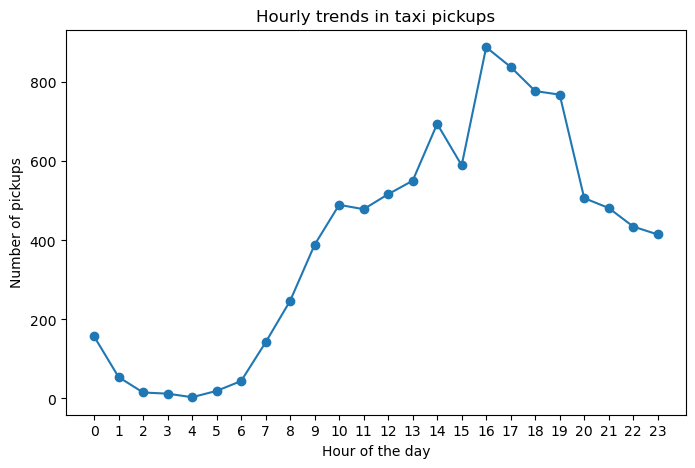

In [28]:
# Find and show the hourly trends in taxi pickups
#Extracting pickup hour from pickup datetime
df_new["pickup_hour"] = df_new["tpep_pickup_datetime"].dt.hour

# hourly pickup counts
hourly_trips = df_new["pickup_hour"].value_counts().sort_index()

plt.figure(figsize = [8,5])
plt.plot(hourly_trips.index, hourly_trips.values, marker = 'o')
plt.title("Hourly trends in taxi pickups")
plt.xlabel("Hour of the day")
plt.ylabel("Number of pickups")
plt.xticks(range(0,24))
plt.show()


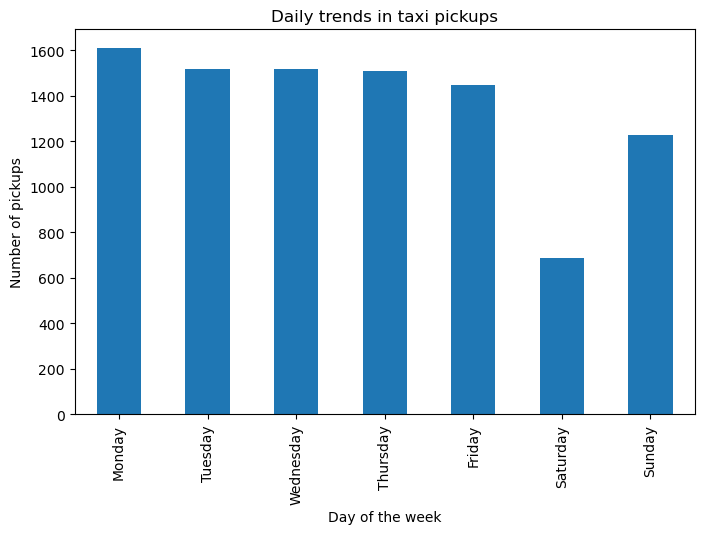

In [29]:
# Find and show the daily trends in taxi pickups (days of the week)
# Extract day of week from pickup datetime
df_new["pickup_day"] = df_new["tpep_pickup_datetime"].dt.day_name()

# Define correct order of days
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# daily pickup counts
daily_trips = df_new["pickup_day"].value_counts().reindex(day_order)

#Plotting daily trends
plt.figure(figsize = [8,5])
daily_trips.plot(kind = "bar")
plt.title("Daily trends in taxi pickups")
plt.xlabel("Day of the week")
plt.ylabel("Number of pickups")
plt.show()

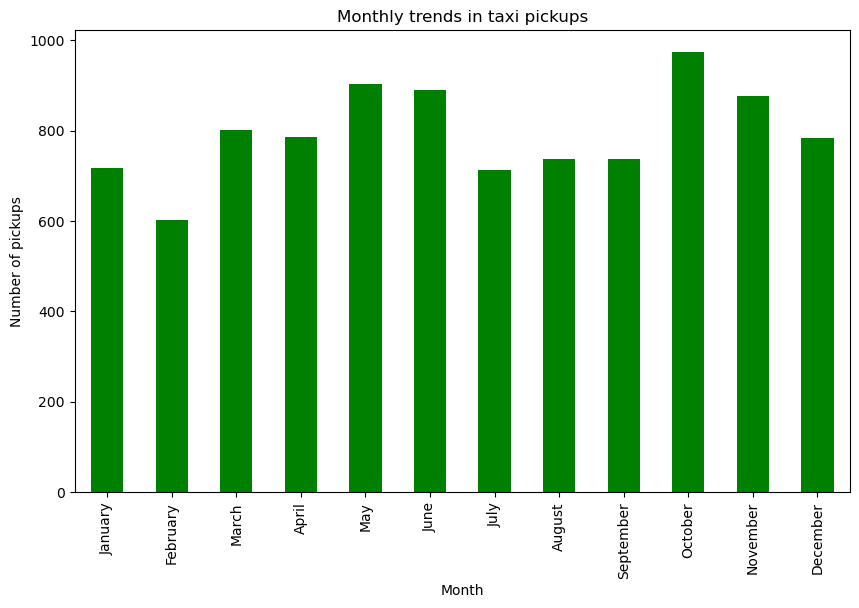

In [30]:
# Show the monthly trends in pickups
# Extract month from pickup datetime
df_new["pickup_month"] = df_new["tpep_pickup_datetime"].dt.month_name()

#Ordering months correctly
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

#Monthly pickup counts
monthly_trips = df_new["pickup_month"].value_counts().reindex(month_order)

#Plotting monthly trends
plt.figure(figsize = [10,6])
monthly_trips.plot(kind = "bar", color = "green")
plt.title("Monthly trends in taxi pickups")
plt.xlabel("Month")
plt.ylabel("Number of pickups")
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [31]:
# Analyse the above parameters
financial_cols = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Checking for zero values in financial columns
zero_counts = (df_new[financial_cols] == 0).sum()

#Checking for negative counts in financial columns
negative_counts = (df_new[financial_cols] < 0).sum()

zero_counts, negative_counts

(fare_amount         0
 tip_amount       1563
 total_amount        0
 trip_distance      22
 dtype: int64,
 fare_amount      0
 tip_amount       0
 total_amount     0
 trip_distance    0
 dtype: int64)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [32]:
# Create a df with non zero entries for the selected parameters.
df_non_zero = df_new[(df_new["fare_amount"] > 0) & (df_new["total_amount"] > 0)].copy()

df_non_zero.shape


(9518, 22)

In [33]:
df_non_zero.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_hour',
 'pickup_day',
 'pickup_month']

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

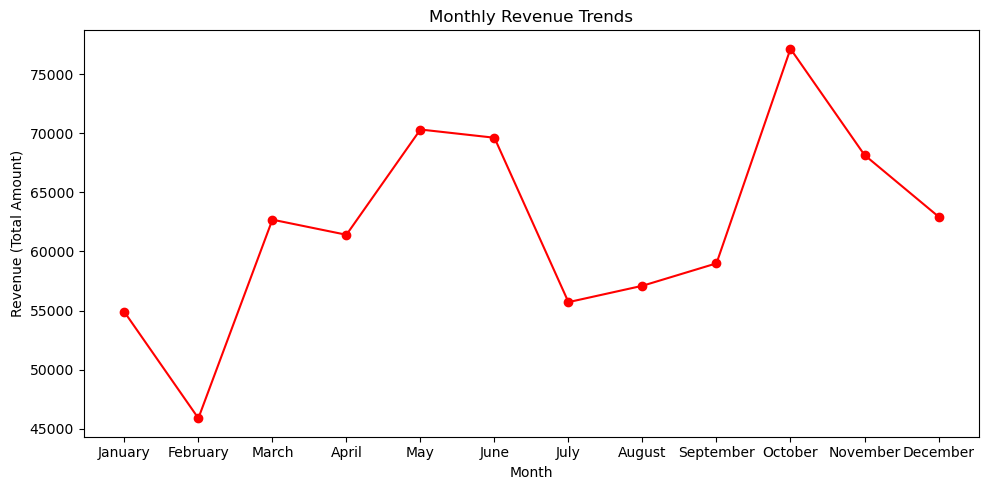

In [34]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_non_zero.groupby("pickup_month")["total_amount"].sum().reindex(month_order)

# Plotting monthly revenue trends
plt.figure(figsize = [10,5])
plt.plot(monthly_revenue.index, monthly_revenue.values, marker = 'o', color = 'red')
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Revenue (Total Amount)")
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [35]:
# Calculate proportion of each quarter
# Create quarter column 
df_non_zero["pickup_quarter"] = df_non_zero["tpep_pickup_datetime"].dt.to_period("Q")

# Calculating the quarterly revenue
quarterly_revenue = df_non_zero.groupby("pickup_quarter")["total_amount"].sum()

# Caluculating proportion
quarterly_revenue_proportion = quarterly_revenue/quarterly_revenue.sum()

quarterly_revenue_proportion



pickup_quarter
2023Q1    0.219487
2023Q2    0.270293
2023Q3    0.230670
2023Q4    0.279550
Freq: Q-DEC, Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

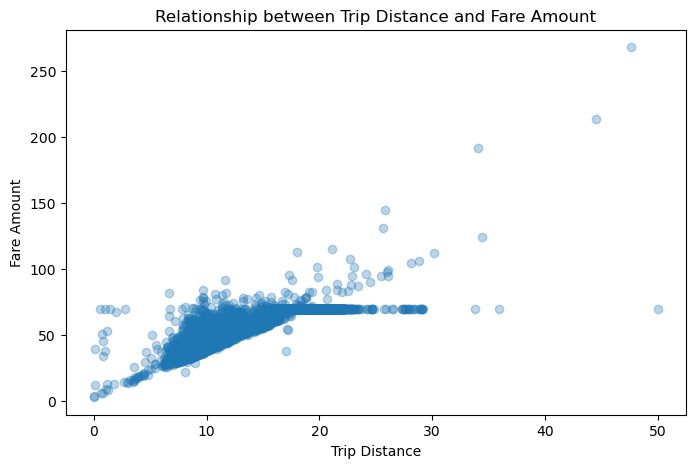

In [36]:
# Show how trip fare is affected by distance
df_distance_fare = df_new[df_new["trip_distance"] > 0]

plt.figure(figsize = [8,5])
plt.scatter(
    df_distance_fare["trip_distance"],
    df_distance_fare["fare_amount"],
    alpha = 0.3
)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Relationship between Trip Distance and Fare Amount")
plt.show()

In [37]:
# Correlation between trip distance and fare amount
correlation_trip_fare = df_distance_fare["trip_distance"].corr(df_distance_fare["fare_amount"])
print(correlation_trip_fare)

0.8939277395519749


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

               fare_amount  trip_duration
fare_amount       1.000000       0.366504
trip_duration     0.366504       1.000000


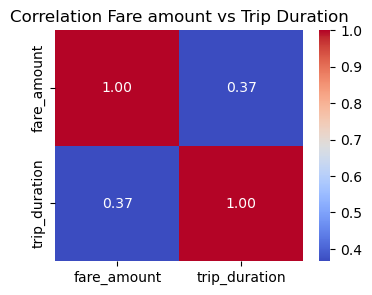

In [38]:
# Show relationship between fare and trip duration
df_new["trip_duration"] = (df_new["tpep_dropoff_datetime"] - df_new["tpep_pickup_datetime"]).dt.total_seconds() / 60
# Filtering out trip durations equal to 0 
df_duration = df_new[df_new["trip_duration"] > 0]

fare_duration_correlation = df_duration[["fare_amount", "trip_duration"]].corr()

print(fare_duration_correlation)

plt.figure(figsize = [4,3])
sns.heatmap(
    fare_duration_correlation,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f"
)
plt.title("Correlation Fare amount vs Trip Duration")
plt.show()

                 fare_amount  passenger_count
fare_amount         1.000000         0.071971
passenger_count     0.071971         1.000000


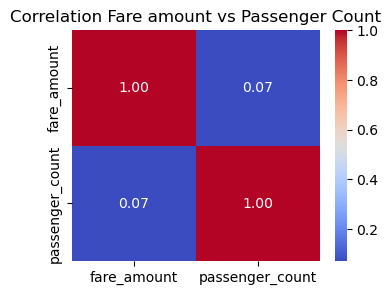

In [39]:
# Show relationship between fare and number of passengers

fare_passengers_corr = df_new[["fare_amount", "passenger_count"]].corr()
print(fare_passengers_corr)

plt.figure(figsize = [4,3])
sns.heatmap(
    fare_passengers_corr,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f"
)
plt.title("Correlation Fare amount vs Passenger Count")
plt.show()

               tip_amount  trip_distance
tip_amount       1.000000       0.129331
trip_distance    0.129331       1.000000


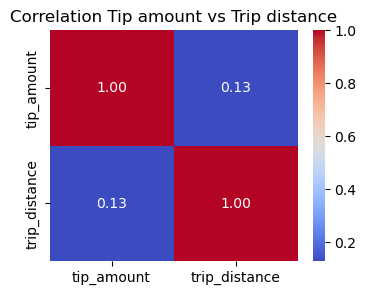

In [40]:
# Show relationship between tip and trip distance
# Filtering non zero distance trips
df_tip_distance = df_new[df_new["trip_distance"] > 0]

#Correlation between tip amount and trip distance
tip_distance_corr = df_tip_distance[["tip_amount", "trip_distance"]].corr()
print(tip_distance_corr)

#Plotting heatmap
plt.figure(figsize = [4,3])
sns.heatmap(
    tip_distance_corr,
    annot = True,
    cmap = "coolwarm",
    fmt = ".2f"
)
plt.title("Correlation Tip amount vs Trip distance")
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

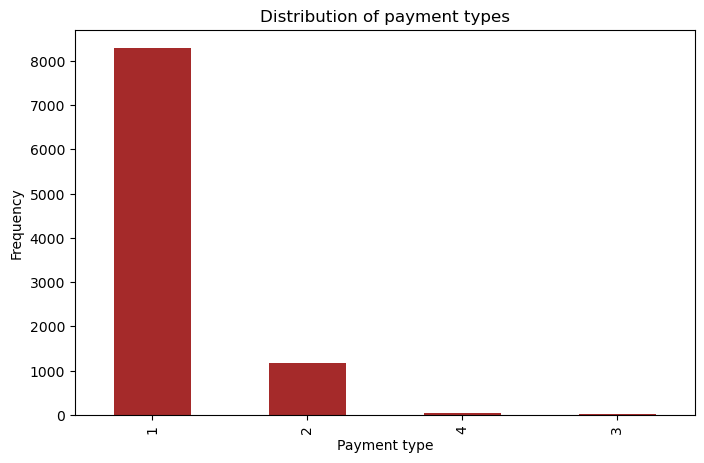

payment_type
1    8284
2    1178
4      32
3      24
Name: count, dtype: int64


In [41]:
# Analyse the distribution of different payment types (payment_type).
payment_trends = df_new["payment_type"].value_counts()

plt.figure(figsize = [8,5])
payment_trends.plot(kind = "bar", color = "brown")
plt.title("Distribution of payment types")
plt.xlabel("Payment type")
plt.ylabel("Frequency")
plt.show()

print(payment_trends)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [72]:
 !pip install geopandas

   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   ------ --------------------------------- 3.7/22.9 MB 18.1 MB/s eta 0:00:02
   ---------- ----------------------------- 5.8/22.9 MB 13.3 MB/s eta 0:00:02
   --------------- ------------------------ 8.9/22.9 MB 14.3 MB/s eta 0:00:01
   --------------------- ------------------ 12.3/22.9 MB 14.3 MB/s eta 0:00:01
   -------------------------- ------------- 15.2/22.9 MB 14.4 MB/s eta 0:00:01
   -------------------------------- ------- 18.9/22.9 MB 14.6 MB/s eta 0:00:01
   ------------------------------------- -- 21.2/22.9 MB 14.2 MB/s eta 0:00:01
   -------------------------------------- - 22.3/22.9 MB 14.0 MB/s eta 0:00:01
   ---------------------------------------  22.5/22.9 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 22.9/22.9 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ------------------- -------------------- 3.1/6.3 MB 16.3 MB/s eta 0:00:

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [42]:
# import geopandas as gpd
import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\dkevi\OneDrive\Desktop\Data Science & AI - IIITB\Data_Analysis_Exploration\EDA_assignment_NYC_taxi\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

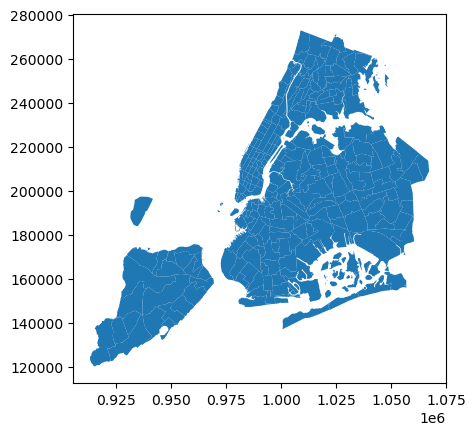

In [43]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [44]:
# Merge zones and trip records using locationID and PULocationID
df_with_pickup_zone = df_new.merge(
    zones[["LocationID", "zone", "borough", "geometry"]],
    left_on = "PULocationID",
    right_on = "LocationID",
    how = "left"
)
df_with_pickup_zone.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,pickup_hour,pickup_day,pickup_month,trip_duration,LocationID,zone,borough,geometry
0,2,2023-04-06 16:51:18,2023-04-06 17:18:31,3,8.83,1,N,138,164,1,...,2.5,1.75,16,Thursday,April,27.216667,138.0,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-09-15 09:50:48,2023-09-15 10:36:38,5,11.53,1,N,138,230,1,...,2.5,1.75,9,Friday,September,45.833333,138.0,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
2,2,2023-12-01 17:00:12,2023-12-01 18:02:49,1,9.51,1,N,138,229,1,...,2.5,1.75,17,Friday,December,62.616667,138.0,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
3,1,2023-01-05 21:20:33,2023-01-05 21:54:31,1,18.80,2,N,132,209,1,...,2.5,1.25,21,Thursday,January,33.966667,132.0,JFK Airport,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
4,2,2023-04-23 16:30:57,2023-04-23 16:49:30,1,8.38,1,N,138,233,1,...,2.5,1.75,16,Sunday,April,18.550000,138.0,LaGuardia Airport,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."


In [45]:
df_with_pickup_zone[["PULocationID", "zone", "borough"]].head()

,PULocationID,zone,borough
0,138,LaGuardia Airport,Queens
1,138,LaGuardia Airport,Queens
2,138,LaGuardia Airport,Queens
3,132,JFK Airport,Queens
4,138,LaGuardia Airport,Queens


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [46]:
# Group data by location and calculate the number of trips
trip_location_count = df_with_pickup_zone.groupby("LocationID").size().reset_index(name = "trip_count")
trip_location_count


,LocationID,trip_count
0,10.0,1
1,13.0,1
2,50.0,1
3,70.0,555
4,93.0,1
5,114.0,1
6,129.0,1
7,132.0,2593
8,138.0,6265
9,145.0,1


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [47]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(
    trip_location_count,
    on = "LocationID",
    how = "left"
)
zones_with_trips["trip_count"] = zones_with_trips["trip_count"].fillna(0)
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",0.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",0.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",0.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",0.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

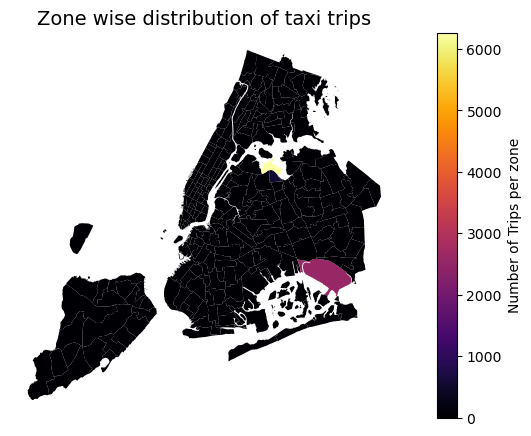

In [48]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = [10,5])
# Plot the map and display it
zones_with_trips.plot(
    column = "trip_count",
    ax = ax,
    cmap = "inferno",
    legend = True,
    legend_kwds = {
        "label": "Number of Trips per zone",
        "orientation": "vertical"
    }
)
ax.set_title("Zone wise distribution of taxi trips", fontsize = 14)
ax.axis("off")

plt.show()

In [49]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips_sorted = zones_with_trips.sort_values(
    by = "trip_count",
    ascending = False
)
zones_with_trips_sorted

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
137,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",6265.0
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",2593.0
69,70,0.063840,0.000195,East Elmhurst,70,Queens,"POLYGON ((1023276.361 216661.299, 1023320.055 ...",555.0
169,170,0.045769,0.000074,Murray Hill,170,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",4.0
229,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21...",4.0
...,...,...,...,...,...,...,...,...
18,19,0.101825,0.000547,Bellerose,19,Queens,"POLYGON ((1060888.899 212784.64, 1061115.169 2...",0.0
19,20,0.051440,0.000135,Belmont,20,Bronx,"POLYGON ((1016371.834 254183.401, 1016392.376 ...",0.0
20,21,0.115974,0.000380,Bensonhurst East,21,Brooklyn,"POLYGON ((991418.043 161321.434, 991460.573 16...",0.0
21,22,0.126170,0.000472,Bensonhurst West,22,Brooklyn,"POLYGON ((986318.162 166716.417, 987000.047 16...",0.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [50]:
# Find routes which have the slowest speeds at different times of the day
# Filtering out valid trips with non zero distance and duration
df_routes = df_new[(df_new["trip_distance"] > 0) & (df_new["trip_duration"] > 0)]

# Group by route (PU to DO) and pickup hour
route_hour_stats = (df_routes.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).
                    agg(
                        avg_distance = ("trip_distance", "mean"),
                        avg_duration = ("trip_duration", "mean"),
                        trip_count = ("trip_distance", "count")
                    )
                    .reset_index()
)


# Calculate average speed in mph
route_hour_stats["avg_speed_mph"] = (route_hour_stats["avg_distance"] / route_hour_stats["avg_duration"]) * 60

# Keeping only route hour combinations with sufficient trips
route_hour_filtered = route_hour_stats[route_hour_stats["trip_count"] >= 10]

#Find the slowest routes for each hour
slowest_routes_per_hour = route_hour_filtered.sort_values(["pickup_hour", "avg_speed_mph"]).groupby("pickup_hour").head(5).reset_index(drop = True)

slowest_routes_per_hour.head(10)

,PULocationID,DOLocationID,pickup_hour,avg_distance,avg_duration,trip_count,avg_speed_mph
0,138,161,7,10.572857,39.389286,14,16.105177
1,138,162,7,10.116364,37.603030,11,16.141833
2,138,161,8,10.908750,50.118750,16,13.059484
3,138,162,8,10.468889,47.216667,18,13.303212
4,138,230,8,11.574706,51.091176,17,13.593000
5,138,162,9,9.445200,73.681333,25,7.691392
6,138,48,9,10.614167,55.340278,12,11.507893
7,138,100,9,10.604545,50.169697,11,12.682411
8,138,68,9,10.486923,44.867949,13,14.023716
9,138,161,9,10.390000,42.300000,29,14.737589


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

16 16


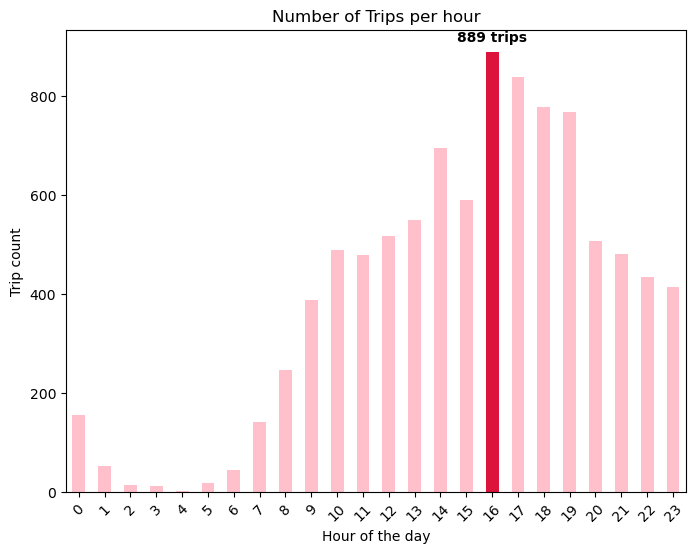

In [51]:
# Visualise the number of trips per hour and find the busiest hour
# Calculate the number of trips per hour
trips_per_hour = df_new.groupby("pickup_hour").size()
trips_per_hour
busiest_hour = trips_per_hour.idxmax()
busiest_hour_trips = busiest_hour.max()

print(busiest_hour, busiest_hour_trips)

plt.figure(figsize = [8,6])
colors = ['pink' if hour != 16 else 'crimson' for hour in trips_per_hour.index]
ax = trips_per_hour.plot(kind='bar', color=colors)

# Annotate busiest hour
ax.text(
    16,
    trips_per_hour[16] + 20,
    f"{trips_per_hour[16]} trips",
    ha='center',
    fontweight='bold'
)
plt.title("Number of Trips per hour")
plt.xlabel("Hour of the day")
plt.ylabel("Trip count")
plt.xticks(rotation = 45)
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [52]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Top 5 busiest hours from the sampled data
top_5_busiest_hours = trips_per_hour.sort_values(ascending = False).head()
print(top_5_busiest_hours)

# Scaling up the trip counts
actual_trip_counts = (top_5_busiest_hours/sample_fraction).astype(int)
print(actual_trip_counts)


pickup_hour
16    889
17    839
18    778
19    769
14    695
dtype: int64
pickup_hour
16    17780
17    16780
18    15560
19    15380
14    13900
dtype: int64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

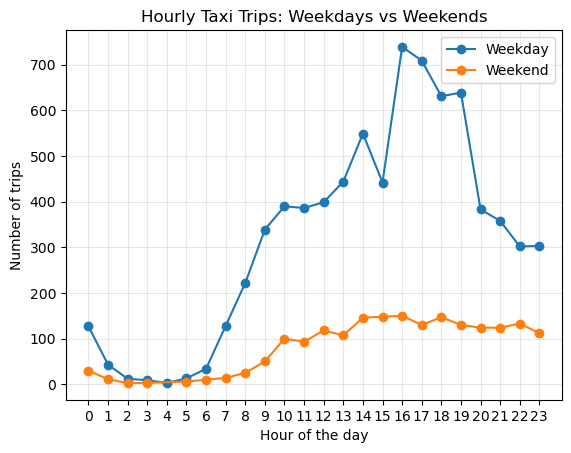

In [53]:
# Compare traffic trends for the week days and weekends
# Create day of the week (Monday=0, Sunday=6)
df_new["day_of_the_week"] = df_new["tpep_pickup_datetime"].dt.day_of_week

#Label weekdays and weekends
df_new["day_type"] = df_new["day_of_the_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Hourly trip counts by day type
hourly_trips_day_type = df_new.groupby(["day_type", "pickup_hour"]).size().reset_index(name = "trip_count")

# Plotting the trends
for day_type in ["Weekday", "Weekend"]:
    subset = hourly_trips_day_type[hourly_trips_day_type["day_type"] == day_type]
    plt.plot(
        subset["pickup_hour"],
        subset["trip_count"],
        marker = 'o',
        label = day_type
    )

plt.xlabel("Hour of the day")
plt.ylabel("Number of trips")
plt.title("Hourly Taxi Trips: Weekdays vs Weekends")
plt.xticks(range(0,24))
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Index([138, 132, 70, 264, 170, 230, 164, 262, 13, 10], dtype='int64', name='PULocationID')
Index([230, 161, 164, 162, 163, 48, 170, 68, 239, 100], dtype='int64', name='DOLocationID')


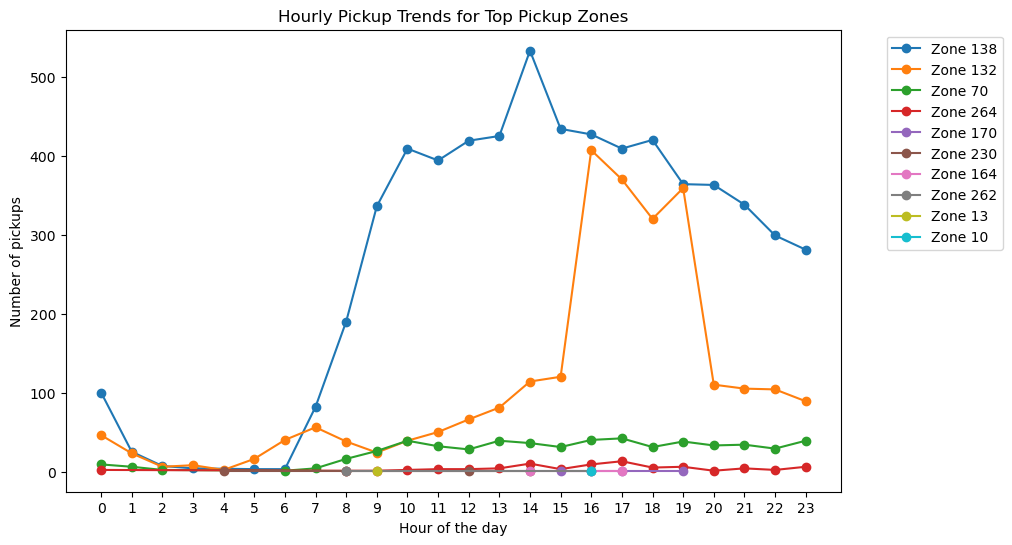

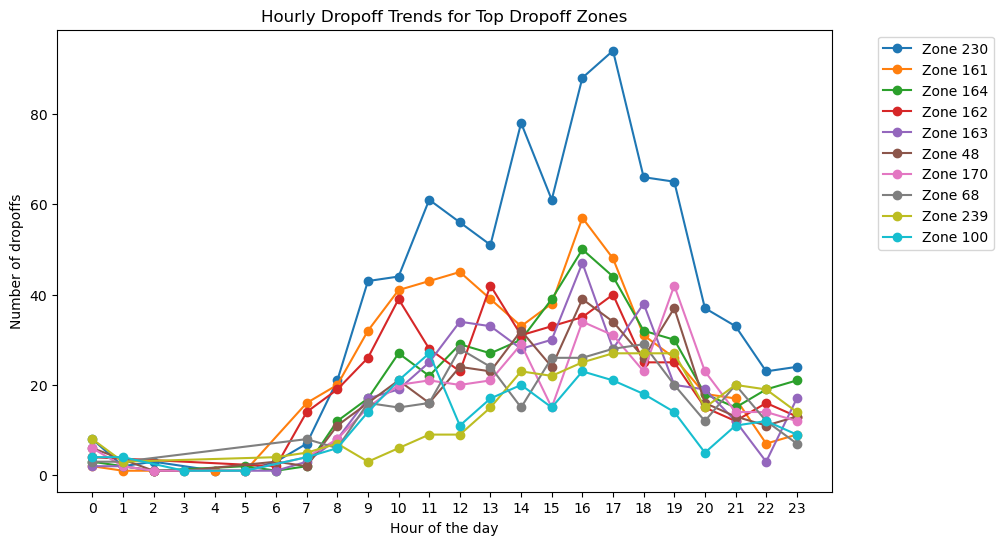

In [54]:
# Find top 10 pickup and dropoff zones
# top pickup zones
top_pickup_zones = df_new.groupby(["PULocationID"]).size().sort_values(ascending = False).head(10).index
print(top_pickup_zones)

# top dropoff zones
top_dropoff_zones = df_new.groupby("DOLocationID").size().sort_values(ascending = False).head(10).index
print(top_dropoff_zones)

# Hourly pickup trends for top pickup zones
top_pickup_hourly = df_new[df_new["PULocationID"].isin(top_pickup_zones)].groupby(["PULocationID", "pickup_hour"]).size().reset_index(name = "trip_count")

# Visualise the hourly pickup trends for top pickup zones
plt.figure(figsize = [10,6])
for zone in top_pickup_zones:
    zone_data = top_pickup_hourly[top_pickup_hourly["PULocationID"] == zone]
    plt.plot(zone_data["pickup_hour"], zone_data["trip_count"], label = f"Zone {zone}", marker = "o")

plt.xlabel("Hour of the day")
plt.ylabel("Number of pickups")
plt.title("Hourly Pickup Trends for Top Pickup Zones")
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.xticks(range(0,24))
plt.show()

# Hourly dropoff trends for top dropoff zones
top_dropoff_hourly = df_new[df_new["DOLocationID"].isin(top_dropoff_zones)].groupby(["pickup_hour", "DOLocationID"]).size().reset_index(name = "trip_count")

# Visualise the hourly dropoff trends for top dropoff zones
plt.figure(figsize = [10,6])
for zone in top_dropoff_zones:
    zone_data = top_dropoff_hourly[top_dropoff_hourly["DOLocationID"] == zone]
    plt.plot(zone_data["pickup_hour"], zone_data["trip_count"], label = f"Zone {zone}", marker = 'o')

plt.xlabel("Hour of the day")
plt.ylabel("Number of dropoffs")
plt.title("Hourly Dropoff Trends for Top Dropoff Zones")
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.xticks(range(0,24))
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [55]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_dropoff_ratio = (df_new.groupby("PULocationID").size() / df_new.groupby("DOLocationID").size()).dropna()
pickup_dropoff_ratio_high = pickup_dropoff_ratio.sort_values(ascending = False).head(10)
pickup_dropoff_ratio_low = pickup_dropoff_ratio.sort_values(ascending = True).head(10)
print(pickup_dropoff_ratio_high)
print(pickup_dropoff_ratio_low)

70     555.000000
138    368.529412
132    324.125000
264      1.973684
260      1.000000
129      1.000000
223      0.500000
193      0.500000
10       0.333333
145      0.166667
dtype: float64
162    0.002262
163    0.002584
233    0.003968
236    0.004065
164    0.004515
230    0.004598
186    0.005263
234    0.006579
148    0.006897
262    0.009479
dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [56]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filtering data for night hours
df_night = df_new[(df_new["pickup_hour"] >= 23) | (df_new["pickup_hour"] < 5)]

# top 10 pickup zones during night hours
top_10_pickup_night = df_night.groupby("PULocationID").size().sort_values(ascending = False).head(10).index
print(top_10_pickup_night)

# top 10 dropoff zones during night hours
top_10_dropoff_night = df_night.groupby("DOLocationID").size().sort_values(ascending = False).head(10).index
print(top_10_dropoff_night)

Index([138, 132, 70, 264, 230], dtype='int64', name='PULocationID')
Index([230, 164, 262, 239, 163, 48, 141, 170, 107, 140], dtype='int64', name='DOLocationID')


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [57]:
# Filter for night hours (11 PM to 5 AM)
# already filtered above for night hours (df_night)
# Calculate night revenue
night_revenue = df_night["total_amount"].sum()
print(f" Night revenue: {night_revenue}")

# Calculate total revenue
total_revenue = df_new["total_amount"].sum()
print(f" Total revenue: {total_revenue}")

#Filter for day hours (5 AM to 11 PM)
df_day = df_new[(df_new["pickup_hour"] >= 5) & (df_new["pickup_hour"] < 23)]

# Calculate day revenue
day_revenue = df_day["total_amount"].sum()
print(f" Day revenue: {day_revenue}")

# Calculate revenue share for night and day
revenue_share_night = (night_revenue / total_revenue) * 100
revenue_share_day = (day_revenue / total_revenue) * 100

print(f"Night Revenue Share: {revenue_share_night:.2f}%")
print(f"Day Revenue Share: {revenue_share_day:.2f}%")

 Night revenue: 47456.61
 Total revenue: 744880.6699999999
 Day revenue: 697424.0599999999
Night Revenue Share: 6.37%
Day Revenue Share: 93.63%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [58]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate average fare per passenger count
avg_fare_per_passenger_count = df_new.groupby("passenger_count")["total_amount"].mean()

# Filtering out passenger count of zero
avg_fare_per_passenger_count_filtered = avg_fare_per_passenger_count[avg_fare_per_passenger_count.index > 0]

# Calculate average miles per passenger count
avg_miles_per_passenger_count = df_new.groupby("passenger_count")["trip_distance"].mean()

# Filtering out passenger count of zero
avg_miles_per_passenger_count_filtered = avg_miles_per_passenger_count[avg_miles_per_passenger_count.index > 0]

# Calculate average fare per mile per passenger count
avg_fare_per_mile_per_passenger_count = avg_fare_per_passenger_count_filtered / avg_miles_per_passenger_count_filtered

# Calculate average fare per mile per passenger count per passenger
avg_fare_per_mile_per_passenger_count_per_passenger = avg_fare_per_mile_per_passenger_count / avg_fare_per_mile_per_passenger_count.index
avg_fare_per_mile_per_passenger_count_per_passenger


passenger_count
1    6.457052
2    3.071608
3    1.996512
4    1.539231
5    1.315774
6    1.082721
dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

pickup_hour
0     5.921286
1     5.575256
2     5.959296
3     5.042551
4     5.846103
5     5.209490
6     5.064686
7     6.107270
8     6.846228
9     7.030549
10    6.885959
11    6.847240
12    6.732774
13    6.718722
14    6.686427
15    6.698833
16    6.161392
17    6.197055
18    6.093777
19    5.916033
20    6.226296
21    6.172444
22    6.126318
23    6.150341
dtype: float64


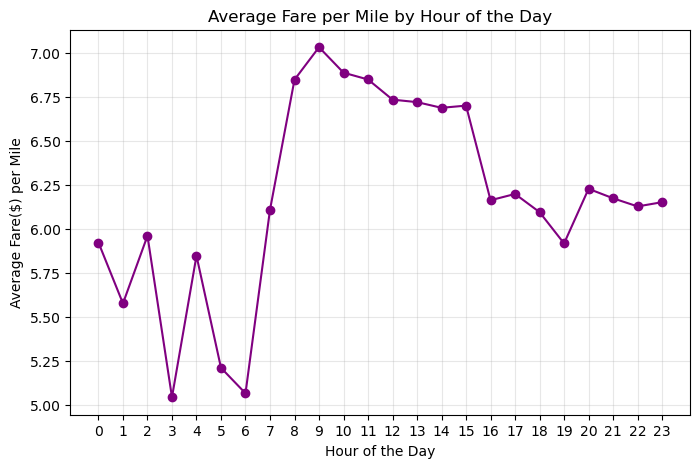

pickup_day
Friday       6.381149
Monday       6.249199
Saturday     6.177773
Sunday       6.226788
Thursday     6.434754
Tuesday      6.441080
Wednesday    6.459627
dtype: float64


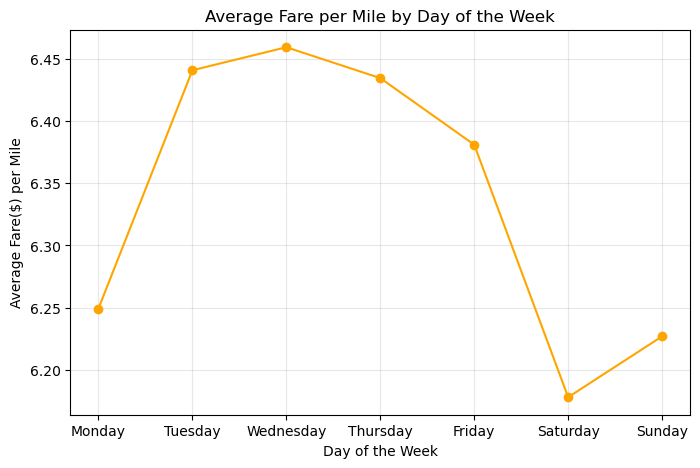

In [59]:
# Compare the average fare per mile for different days and for different times of the day
# Average fare per mile for different hours of the day
avg_fare_per_mile_per_hour = df_new.groupby("pickup_hour")["total_amount"].mean() / df_new.groupby("pickup_hour")["trip_distance"].mean()
print(avg_fare_per_mile_per_hour)

# Plotting average fare per mile for different hours of the day
plt.figure(figsize = [8,5])
avg_fare_per_mile_per_hour.plot(marker = 'o', color = "purple")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare($) per Mile")
plt.xticks(range(0,24))
plt.grid(True, alpha = 0.3)
plt.show()

# Average fare per mile for days of the week
avg_fare_per_mile_per_day_of_week = df_new.groupby("pickup_day")["total_amount"].mean() / df_new.groupby("pickup_day")["trip_distance"].mean()
print(avg_fare_per_mile_per_day_of_week)

# Plotting average fare per mile for different days of the week
plt.figure(figsize = [8,5])
avg_fare_per_mile_per_day_of_week.reindex(day_order).plot(marker = 'o', color = "orange")
plt.title("Average Fare per Mile by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare($) per Mile")
plt.grid(True, alpha = 0.3)
plt.show()  

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

VendorID
1    5.783993
2    6.688227
dtype: float64


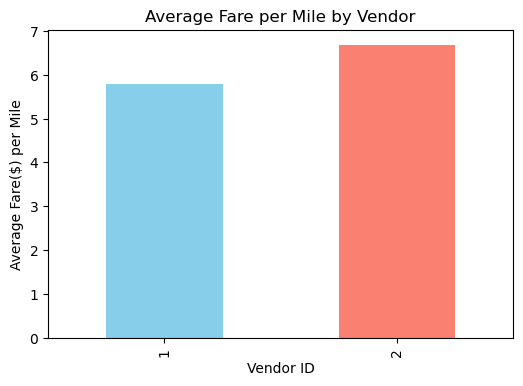

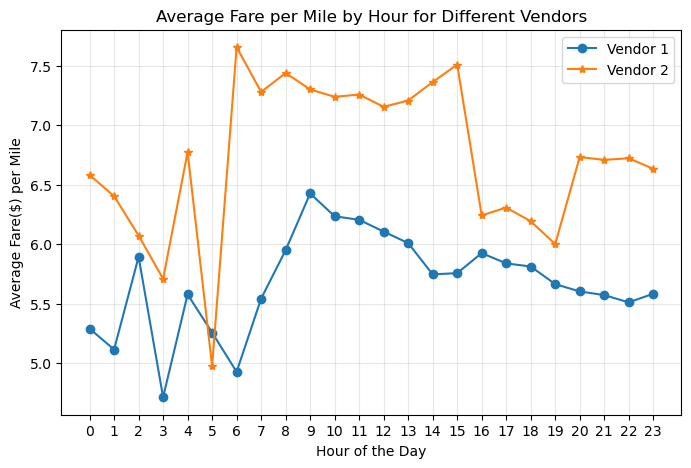

In [60]:
# Compare fare per mile for different vendors
# Average fare per mile for different vendors
fare_per_mile_per_vendor = df_new.groupby("VendorID")["total_amount"].mean() / df_new.groupby("VendorID")["trip_distance"].mean()
print(fare_per_mile_per_vendor)
# Plotting average fare per mile for different vendors
plt.figure(figsize = [6,4])
colors = ['skyblue', 'salmon']
fare_per_mile_per_vendor.plot(kind = "bar", color = colors)
plt.title("Average Fare per Mile by Vendor")
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare($) per Mile")
plt.show()

#Average fare per mile per hour for vendor 1
df_vendor1 = df_new[df_new["VendorID"] == 1]
avg_fare_per_mile_per_hour_vendor1 = df_vendor1.groupby("pickup_hour")["total_amount"].mean() / df_vendor1.groupby("pickup_hour")["trip_distance"].mean()


#Average fare per mile per hour for vendor 2
df_vendor2 = df_new[df_new["VendorID"] == 2]
avg_fare_per_mile_per_hour_vendor2 = df_vendor2.groupby("pickup_hour")["total_amount"].mean() / df_vendor2.groupby("pickup_hour")["trip_distance"].mean()


# Plotting average fare per mile per hour for both vendors
plt.figure(figsize = [8,5])
plt.plot(
    avg_fare_per_mile_per_hour_vendor1.index,
    avg_fare_per_mile_per_hour_vendor1.values,
    marker = 'o',
    label = "Vendor 1"
)
plt.plot(
    avg_fare_per_mile_per_hour_vendor2.index,
    avg_fare_per_mile_per_hour_vendor2.values,
    marker ='*',
    label = "Vendor 2"
)
plt.title("Average Fare per Mile by Hour for Different Vendors")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare($) per Mile")
plt.xticks(range(0,24))
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


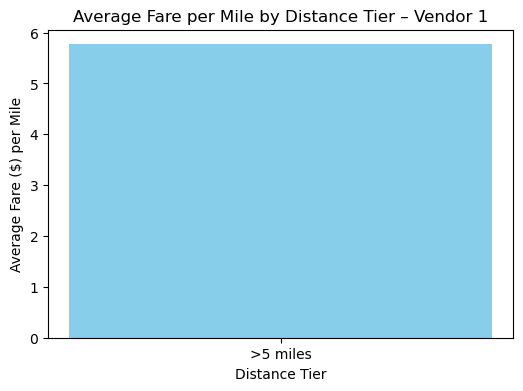

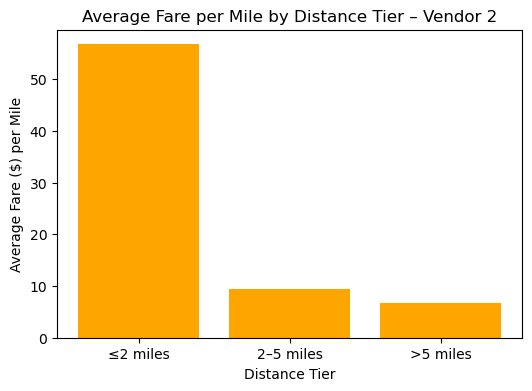

In [61]:
# Defining distance tiers
# --------- Distance Tier Threshold to avoid near-zero distortion ---------
MIN_DISTANCE = 0.5  # miles

# ---------------- Vendor 1 Tier Analysis ----------------
df_vendor1_valid = df_vendor1[df_vendor1["trip_distance"] >= MIN_DISTANCE]

v1_tier1 = df_vendor1_valid[df_vendor1_valid["trip_distance"] <= 2]
v1_tier2 = df_vendor1_valid[(df_vendor1_valid["trip_distance"] > 2) & (df_vendor1_valid["trip_distance"] <= 5)]
v1_tier3 = df_vendor1_valid[df_vendor1_valid["trip_distance"] > 5]

v1_fare_per_mile = [
    v1_tier1["total_amount"].mean() / v1_tier1["trip_distance"].mean(),
    v1_tier2["total_amount"].mean() / v1_tier2["trip_distance"].mean(),
    v1_tier3["total_amount"].mean() / v1_tier3["trip_distance"].mean()
]

plt.figure(figsize=(6,4))
plt.bar(["≤2 miles", "2–5 miles", ">5 miles"], v1_fare_per_mile, color="skyblue")
plt.title("Average Fare per Mile by Distance Tier – Vendor 1")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare ($) per Mile")
plt.show()

# ---------------- Vendor 2 Tier Analysis ----------------
df_vendor2_valid = df_vendor2[df_vendor2["trip_distance"] >= MIN_DISTANCE]

v2_tier1 = df_vendor2_valid[df_vendor2_valid["trip_distance"] <= 2]
v2_tier2 = df_vendor2_valid[(df_vendor2_valid["trip_distance"] > 2) & (df_vendor2_valid["trip_distance"] <= 5)]
v2_tier3 = df_vendor2_valid[df_vendor2_valid["trip_distance"] > 5]

v2_fare_per_mile = [
    v2_tier1["total_amount"].mean() / v2_tier1["trip_distance"].mean(),
    v2_tier2["total_amount"].mean() / v2_tier2["trip_distance"].mean(),
    v2_tier3["total_amount"].mean() / v2_tier3["trip_distance"].mean()
]

plt.figure(figsize=(6,4))
plt.bar(["≤2 miles", "2–5 miles", ">5 miles"], v2_fare_per_mile, color="orange")
plt.title("Average Fare per Mile by Distance Tier – Vendor 2")
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare ($) per Mile")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Tip Percentage for Short Trips: 15.69%
Tip Percentage for Medium Trips: 16.07%
Tip Percentage for Long Trips: 19.82%


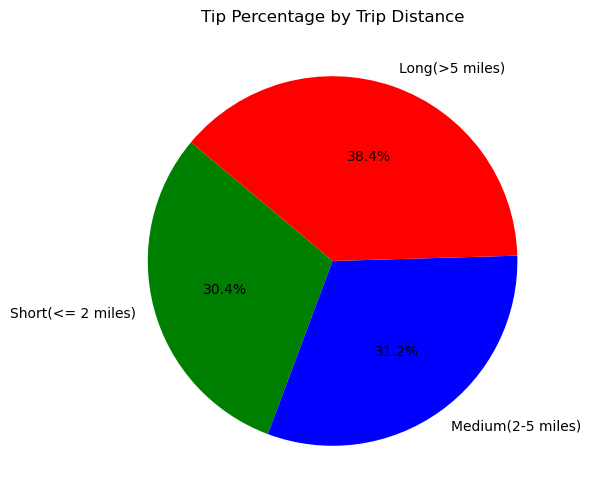

passenger_count
1    20.716104
2    17.797598
3    16.539190
4    16.867867
5    19.490011
6    23.386591
dtype: float64


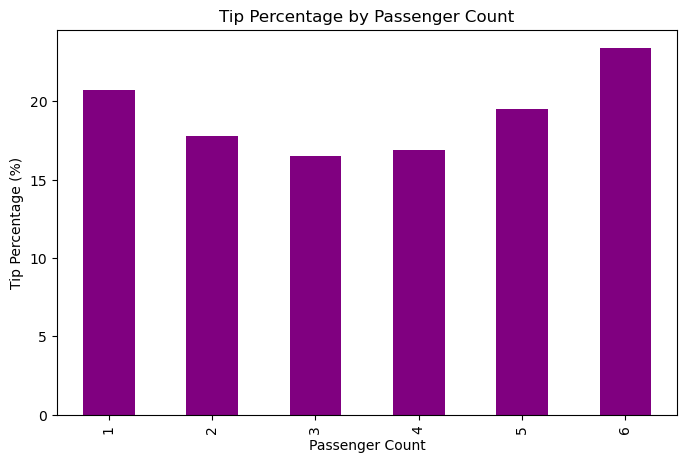

pickup_hour
0     19.624009
1     16.434242
2     19.870519
3     13.663457
4     24.447529
5     15.997067
6     15.533475
7     19.966898
8     20.579716
9     20.682071
10    21.276510
11    20.941713
12    20.061860
13    20.744171
14    19.990130
15    19.348242
16    18.739247
17    19.203886
18    18.959169
19    19.290941
20    19.992161
21    20.692319
22    20.287379
23    20.827828
dtype: float64


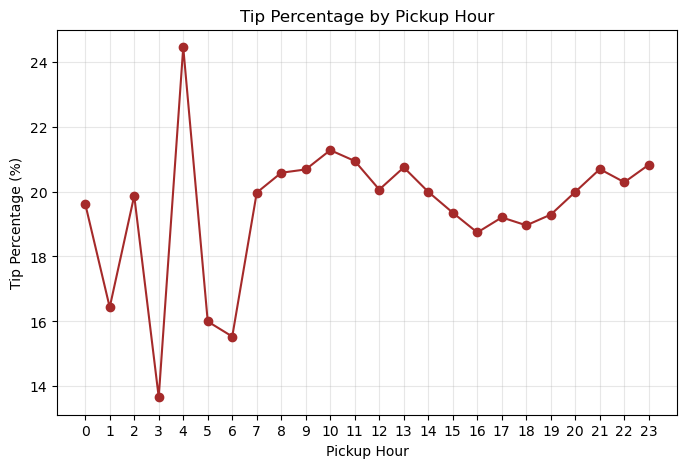

In [62]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Tip percentages based on trip distances
df_short = df_new[df_new["trip_distance"] <= 2]
df_medium = df_new[(df_new["trip_distance"] > 2) & (df_new["trip_distance"] <= 5)]
df_long = df_new[df_new["trip_distance"] > 5]

tip_short_avg = df_short["tip_amount"].mean()
fare_short_avg = df_short["fare_amount"].mean()
tip_medium_avg = df_medium["tip_amount"].mean()
fare_medium_avg = df_medium["fare_amount"].mean()
tip_long_avg = df_long["tip_amount"].mean()
fare_long_avg = df_long["fare_amount"].mean()

print(f"Tip Percentage for Short Trips: {(tip_short_avg / fare_short_avg) * 100:.2f}%")
print(f"Tip Percentage for Medium Trips: {(tip_medium_avg / fare_medium_avg) * 100:.2f}%")
print(f"Tip Percentage for Long Trips: {(tip_long_avg / fare_long_avg) * 100:.2f}%")  

#Plotting tip percentages for different trip distances
Labels = ["Short(<= 2 miles)", "Medium(2-5 miles)", "Long(>5 miles)"]
Sizes = [(tip_short_avg / fare_short_avg) * 100, (tip_medium_avg / fare_medium_avg) * 100, (tip_long_avg / fare_long_avg) * 100]
colors = ["green", "blue", "red"]
plt.figure(figsize = [6,6])
plt.pie(
    Sizes,
    labels = Labels,
    colors = colors,
    autopct = "%1.1f%%",
    startangle = 140
)
plt.title("Tip Percentage by Trip Distance")
plt.show()

# Tip percentages based on passenger counts
df_passenger = df_new[df_new["passenger_count"] > 0]
avg_tip_by_passenger_count = df_passenger.groupby("passenger_count")["tip_amount"].mean()
avg_fare_by_passenger_count = df_passenger.groupby("passenger_count")["fare_amount"].mean()
avg_tip_percent_per_passenger_count = (avg_tip_by_passenger_count / avg_fare_by_passenger_count) * 100
print(avg_tip_percent_per_passenger_count)

# Plotting tip percentages for different passenger counts
plt.figure(figsize = [8,5])
avg_tip_percent_per_passenger_count.plot(kind = "bar", color = "purple")
plt.title("Tip Percentage by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Tip Percentage (%)")
plt.show()

# Tip percentages based on pickup hours
avg_tip_by_pickup_hour = df_new.groupby("pickup_hour")["tip_amount"].mean()
avg_fare_by_pickup_hour = df_new.groupby("pickup_hour")["fare_amount"].mean()
avg_tip_percent_by_pickup_hour = (avg_tip_by_pickup_hour / avg_fare_by_pickup_hour) * 100
print(avg_tip_percent_by_pickup_hour)
# Plotting tip percentages for different pickup hours
plt.figure(figsize = [8,5])
avg_tip_percent_by_pickup_hour.plot(marker = 'o', color = "brown")
plt.title("Tip Percentage by Pickup Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Tip Percentage (%)")
plt.xticks(range(0,24))
plt.grid(True, alpha = 0.3)
plt.show()  

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

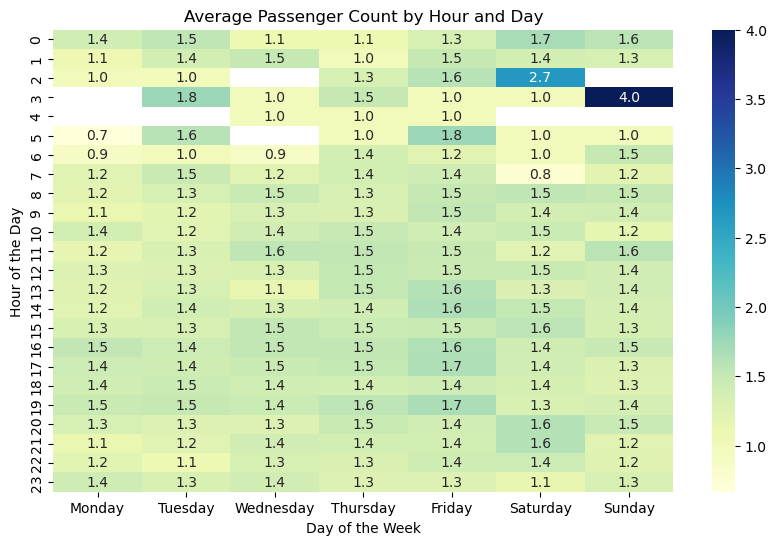

In [63]:
# See how passenger count varies across hours and days
df_passenger_counts = df_new.groupby(["pickup_hour", "pickup_day"])["passenger_count"].mean().reset_index()
# Pivot the data for heatmap
passenger_pivot = df_passenger_counts.pivot(index = "pickup_hour", columns = "pickup_day", values = "passenger_count")
# Reorder columns to match day order
passenger_pivot = passenger_pivot[day_order]
plt.figure(figsize = [10,6])
sns.heatmap(
    passenger_pivot,
    annot = True,
    fmt = ".1f",
    cmap = "YlGnBu"
)
plt.title("Average Passenger Count by Hour and Day")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

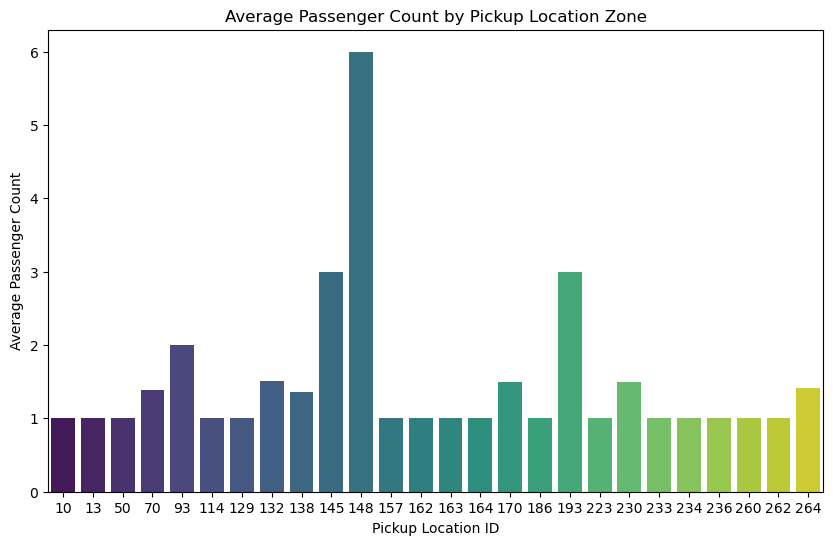

In [64]:
# How does passenger count vary across zones
passenger_counts_zone = df_new.groupby("PULocationID")["passenger_count"].mean().reset_index()

#Plotting the average passenger count per pickup zone
plt.figure(figsize = [10,6])
sns.barplot(
    x = "PULocationID",
    y = "passenger_count",
    data = passenger_counts_zone.sort_values("passenger_count", ascending = False),
    palette = "viridis"
)
plt.title("Average Passenger Count by Pickup Location Zone")
plt.xlabel("Pickup Location ID")
plt.ylabel("Average Passenger Count")
plt.show()


In [65]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips = zones_with_trips.merge(
    passenger_counts_zone,
    left_on = "LocationID",
    right_on = "PULocationID",
    how = "left"
)
# Rename the column for clarity
zones_with_trips.rename(
    columns={"passenger_count": "avg_passenger_count"},
    inplace=True
)
# Drop the redundant PULocationID column
zones_with_trips.drop(columns=["PULocationID"], inplace=True)




In [66]:
# Clean up any extra columns if present
zones_with_trips.drop(
    columns=[
        "PULocationID_x",
        "PULocationID_y",
        "passenger_count_x",
        "passenger_count_y"
    ],
    inplace=True,
    errors="ignore"
)
# Fill NaN values with 0 for zones with no trips
zones_with_trips["avg_passenger_count"] = zones_with_trips["avg_passenger_count"].fillna(0)

zones_with_trips[[
    "zone", "borough", "trip_count", "avg_passenger_count"
]].head(20)




,zone,borough,trip_count,avg_passenger_count
0,Newark Airport,EWR,0.0,0.0
1,Jamaica Bay,Queens,0.0,0.0
2,Allerton/Pelham Gardens,Bronx,0.0,0.0
3,Alphabet City,Manhattan,0.0,0.0
4,Arden Heights,Staten Island,0.0,0.0
5,Arrochar/Fort Wadsworth,Staten Island,0.0,0.0
6,Astoria,Queens,0.0,0.0
7,Astoria Park,Queens,0.0,0.0
8,Auburndale,Queens,0.0,0.0
9,Baisley Park,Queens,1.0,1.0


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

             extra_applied  congestion_surcharge_applied  airport_fee_applied
pickup_hour                                                                  
0                    100.0                         100.0            26.114650
1                    100.0                         100.0            27.777778
2                    100.0                         100.0            20.000000
3                    100.0                         100.0            33.333333
4                    100.0                         100.0           100.000000
5                    100.0                         100.0            42.105263
6                    100.0                         100.0            31.818182
7                    100.0                         100.0            19.718310
8                    100.0                         100.0            20.242915
9                    100.0                         100.0            22.365039
10                   100.0                         100.0        

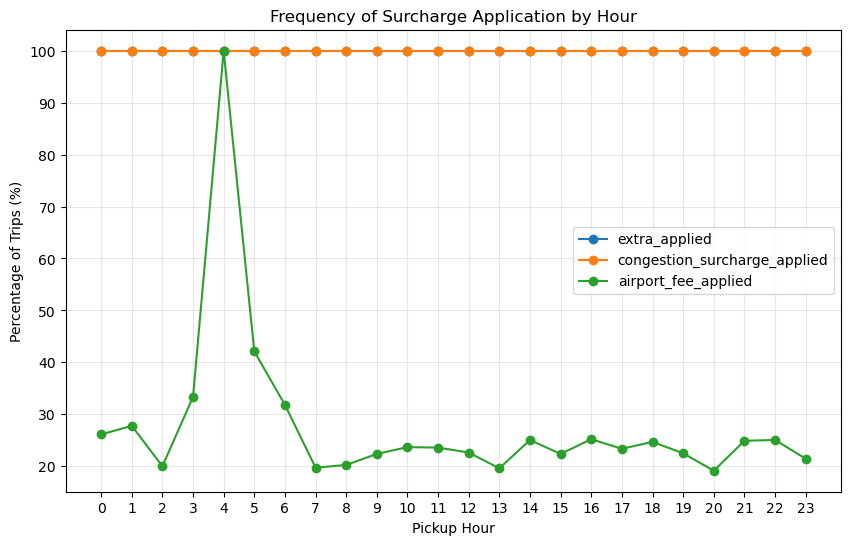

              extra_applied  congestion_surcharge_applied  airport_fee_applied
PULocationID                                                                  
10                    100.0                         100.0           100.000000
13                    100.0                         100.0           100.000000
93                    100.0                         100.0           100.000000
186                   100.0                         100.0           100.000000
230                   100.0                         100.0           100.000000
236                   100.0                         100.0           100.000000
193                   100.0                         100.0           100.000000
157                   100.0                         100.0           100.000000
163                   100.0                         100.0           100.000000
264                   100.0                         100.0            82.666667


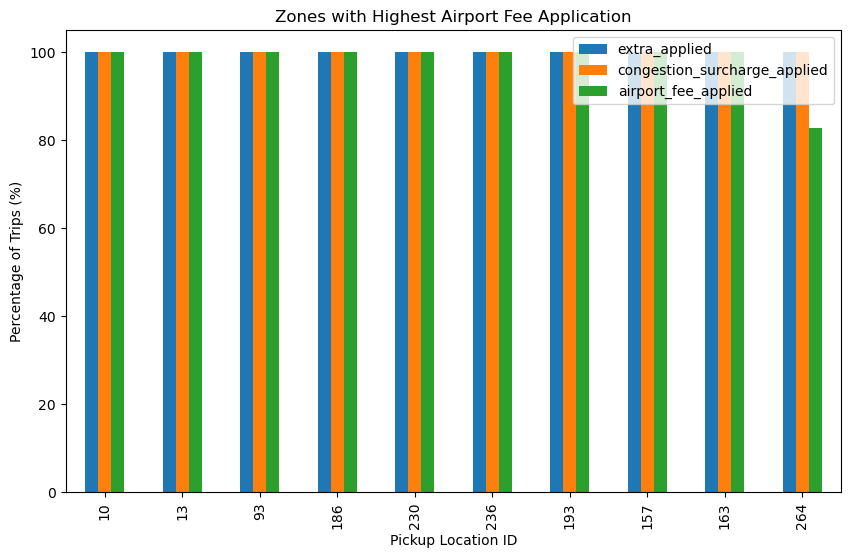

In [67]:
# How often is each surcharge applied?
# -----------------------------
# Correct surcharge flags
# -----------------------------

df_new["extra_applied"] = (df_new["extra"] > 0).astype(int)

df_new["congestion_surcharge_applied"] = (
    df_new["congestion_surcharge"] > 0
).astype(int)

# Airport fee is ONLY applied when value > 0 AND equals known fee
df_new["airport_fee_applied"] = (
    df_new["airport_fee"] == 1.25
).astype(int)

# -----------------------------
# 1. Time-based analysis
# -----------------------------

surcharge_by_hour = df_new.groupby("pickup_hour")[
    ["extra_applied", "congestion_surcharge_applied", "airport_fee_applied"]
].mean() * 100

print(surcharge_by_hour)

surcharge_by_hour.plot(
    figsize=(10, 6),
    marker="o"
)
plt.title("Frequency of Surcharge Application by Hour")
plt.xlabel("Pickup Hour")
plt.ylabel("Percentage of Trips (%)")
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

# -----------------------------
# 2. Zone-based analysis
# -----------------------------

surcharge_by_zone = df_new.groupby("PULocationID")[
    ["extra_applied", "congestion_surcharge_applied", "airport_fee_applied"]
].mean() * 100

top_surcharge_zones = surcharge_by_zone.sort_values(
    by="airport_fee_applied",
    ascending=False
).head(10)

print(top_surcharge_zones)

top_surcharge_zones.plot(
    kind="bar",
    figsize=(10, 6)
)
plt.title("Zones with Highest Airport Fee Application")
plt.xlabel("Pickup Location ID")
plt.ylabel("Percentage of Trips (%)")
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
"""Based on the temporal, geographical, and operational analyses conducted, several actionable recommendations can be made to optimize routing and dispatching strategies, improve fleet utilization, and reduce inefficiencies.

1. Time-based Dynamic Dispatching

The analysis shows distinct peak demand during morning (8 - 10 AM) and evening (4 - 7 PM) hours, especially on weekdays.

Dispatch systems should proactively reposition vehicles toward high-demand zones before these peak windows begin, rather than reacting after congestion builds up.

During late-night and early-morning hours (11 PM - 5 AM), demand is lower but concentrated in specific zones; targeted dispatching in these hours can reduce idle times.

Recommendation:
Implement time-aware dispatch algorithms that adjust vehicle availability and routing priorities based on hour-of-day demand patterns.

2. Zone-based Supply Rebalancing

Certain pickup zones consistently exhibit high pickup-to-dropoff ratios, indicating that vehicles frequently leave these zones and are not returning at the same rate.

Conversely, zones with high dropoffs but low pickups tend to accumulate idle vehicles.

Recommendation:
Use pickup/dropoff imbalance metrics to trigger automated vehicle rebalancing, ensuring that high-pickup zones maintain sufficient supply without over-crowding low-demand areas.

3. Congestion-Aware Routing

The slow-route analysis revealed that specific zone pairs during peak hours exhibit significantly lower average speeds, indicating congestion bottlenecks.

Persistently routing vehicles through these slow corridors increases trip duration and reduces fleet efficiency.

Recommendation:
Integrate hour-specific speed profiles into routing logic to avoid consistently slow routes during peak congestion periods and dynamically reroute vehicles through faster alternatives.

4. Weekend vs Weekday Dispatch Differentiation

Weekday traffic patterns show sharper peaks tied to work commutes, while weekends display more evenly distributed demand across daytime hours.

Applying the same dispatch strategy across all days leads to inefficiencies.

Recommendation:
Adopt separate dispatch models for weekdays and weekends, with weekday models prioritizing rush-hour clustering and weekend models focusing on steady, zone-based availability.

5. Airport and Surcharge-Heavy Zone Optimization

Zones associated with airport fees and higher surcharge frequency show predictable demand and revenue patterns.

Vehicles serving these zones often experience longer trip durations but higher per-trip value.

Recommendation:
Designate special dispatch pools for airport and surcharge-heavy zones to ensure experienced drivers and optimized routing are assigned, minimizing turnaround time while maximizing revenue efficiency.

Summary

By combining time-aware dispatching, zone-based rebalancing, congestion-sensitive routing, and day-specific strategies, fleet operations can be significantly optimized. These recommendations directly address the observed inefficiencies in trip duration, zone imbalance, and peak-hour congestion, enabling better customer service and higher operational efficiency."""

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
"""The spatial and temporal analysis of trip data reveals clear patterns in how demand varies across zones, hours of the day, days of the week, and months. These insights can be leveraged to strategically position cabs in advance, thereby reducing passenger wait times and improving fleet utilization.

1. Peak-Hour Zone Prioritization

Zones such as high-traffic commercial and transit areas consistently show elevated pickup volumes during weekday morning (8 - 10 AM) and evening (4 - 7 PM) peaks.

These zones often experience rapid depletion of available cabs due to high pickup-to-dropoff ratios.

Strategy:
Pre-position additional cabs in these high-demand zones 30 - 60 minutes before peak hours, ensuring adequate availability during rush periods and minimizing missed demand.

2. Night-Time and Late-Hour Concentration

Nighttime analysis (11 PM - 5 AM) indicates that demand becomes highly concentrated in a smaller subset of zones, including nightlife areas, transport hubs, and airport-connected locations.
Despite lower overall demand, trip value and tip percentages tend to be relatively higher during these hours.

Strategy:
Reduce fleet dispersion at night and concentrate cabs in identified night-active zones, allowing better coverage with fewer vehicles and reducing idle cruising.

3. Weekday vs Weekend Positioning

Weekday trips are driven largely by work commutes and follow predictable spatial patterns.

Weekend demand shifts toward leisure, residential, and entertainment zones, with peaks occurring later in the day.

Strategy:
Adopt day-specific positioning strategies:

Weekdays: focus on business districts, transit zones, and residential-to-commercial corridors.

Weekends: increase coverage near leisure hotspots, shopping areas, and nightlife zones.

4. Seasonal and Monthly Adjustments

Monthly trends indicate variations in demand intensity, likely influenced by weather conditions, holidays, and travel seasons.

Certain zones experience disproportionate increases during specific months.

Strategy:
Use historical monthly demand data to adjust baseline fleet allocation, increasing coverage in consistently high-growth zones during peak seasons while scaling back during low-demand months.

5. Balancing Zone Imbalances

Zones with high dropoff volumes but low pickups tend to accumulate idle cabs, while high-pickup zones experience shortages.

Strategy:
Implement dynamic rebalancing rules that periodically move idle cabs from surplus zones to deficit zones, ensuring a more even spatial distribution of supply.

Summary

Strategic cab positioning should be driven by time-aware, zone-specific, and day-sensitive insights. By proactively aligning vehicle availability with observed demand patterns across zones and timeframes, operators can significantly enhance service reliability, reduce inefficiencies, and maximize revenue opportunities."""

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
"""The pricing analysis highlights meaningful variations in fare efficiency across time, distance, vendor, passenger count, and trip context. These insights can be used to design a dynamic and competitive pricing strategy that maximizes revenue without adversely affecting customer satisfaction.

1. Time-Based Dynamic Pricing

Average fare per mile increases during peak daytime hours, particularly between 8 - 11 AM and 4 - 7 PM, reflecting higher demand and congestion.

Nighttime hours generate a smaller share of revenue but show relatively stable fare efficiency.

Pricing Adjustment:
Introduce mild peak-hour price multipliers during consistently high-demand windows while maintaining base fares during off-peak periods. This balances revenue optimization with affordability.

2. Distance-Tiered Pricing Optimization

Short-distance trips (≤2 miles) show disproportionately high fare-per-mile values due to fixed base charges.

Medium and long trips exhibit more stable and predictable fare-per-mile behavior.

Pricing Adjustment:
Maintain competitive base fares for short trips to remain attractive, while optimizing per-mile rates for medium and long-distance trips, where price sensitivity is lower and revenue potential is higher.

3. Vendor-Specific Competitive Positioning

Vendor-level analysis reveals differences in average fare per mile and pricing behavior across hours.

One vendor consistently charges higher fares per mile, particularly during peak periods.

Pricing Adjustment:
Adopt competitive benchmarking against higher-priced vendors by offering slightly lower per-mile rates during peak hours, capturing price-sensitive demand without triggering price wars.

4. Passenger Count-Aware Pricing

Fare per mile per passenger decreases as passenger count increases, indicating cost-sharing effects.

Larger groups generate higher total fares despite lower per-person costs.

Pricing Adjustment:
Encourage group travel by maintaining favorable per-passenger pricing for multi-passenger trips, increasing total fare value while enhancing perceived fairness.

5. Zone and Context-Sensitive Surcharges

Airport-related zones and early-morning hours show higher surcharge frequency and trip value.

These trips are less price-sensitive due to urgency and limited alternatives.

Pricing Adjustment:
Sustain or slightly enhance context-specific surcharges (e.g., airport pickups, late-night hours) while clearly communicating fare components to maintain customer trust.

Summary

A balanced pricing strategy should combine time-based adjustments, distance-tier optimization, competitive vendor benchmarking, and context-aware surcharges. By aligning prices with observed demand elasticity and trip characteristics, operators can maximize revenue while preserving competitiveness and customer satisfaction."""